<a href="https://colab.research.google.com/github/Himanshu-1703/ML_Algorithms/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

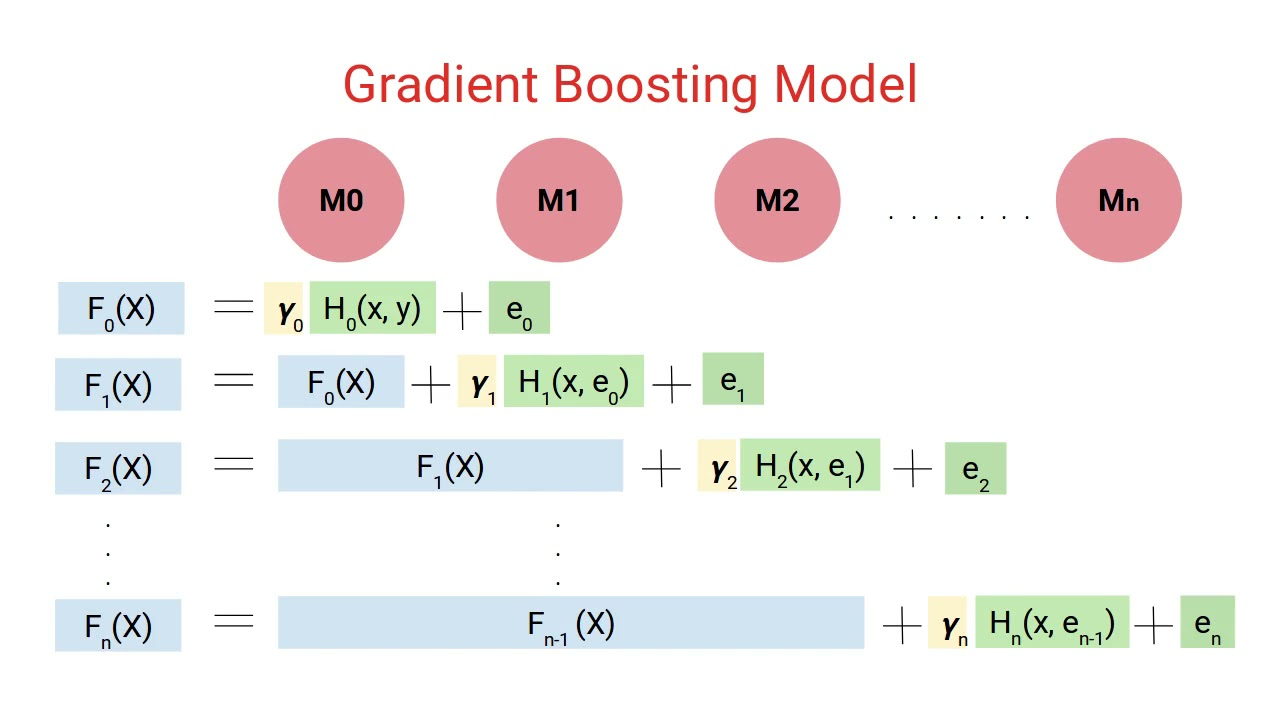

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [2]:
# create the dataset

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
print(X.shape)
print(y.shape)

(100, 1)
(100,)


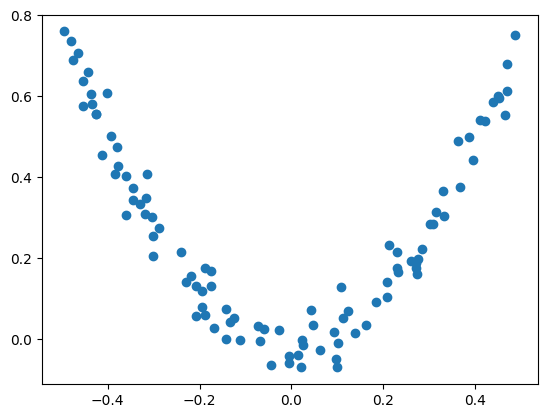

In [3]:
# plot the data

plt.scatter(X,y)
plt.show()

In [4]:
# create the dataframe of the data

data = {'X':X.ravel(),'y':y}
df = pd.DataFrame(data)
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


The first model in the Gradient Boost algorithm is a dumb model and is used only to calculate the mean of the output column and is not a decision tree.

In [5]:
# calculate the mean of the output

y_mean = np.mean(df['y'])
y_mean

0.26545839669679816

In [6]:
# add the column in the data frame
df['pred_1']  = y_mean
df

,X,y,pred_1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


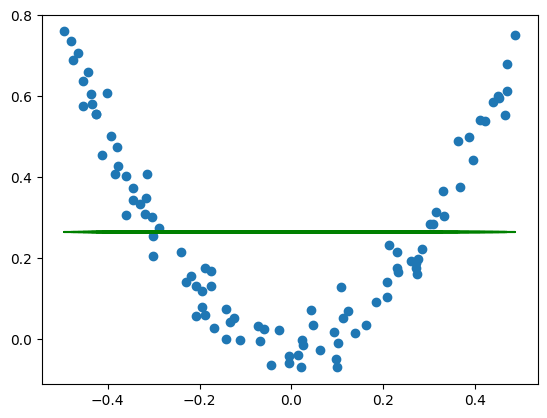

In [7]:
# plot the data

plt.scatter(X,y)
plt.plot(df['X'],df['pred_1'],color='green')
plt.show()

- The residual or the error term for the first model is calculated.

In [8]:
# calculate the residuals

df['resid_1'] = df['y'] - df['pred_1']
df

,X,y,pred_1,resid_1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


Once the residuals are calculated, these residuals are given to the Decision tree model as the output/target variable along with the `X` input column.



In [9]:
# train the first decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score

dt1 = DecisionTreeRegressor(max_leaf_nodes=32)

# fit on the data
dt1.fit(X,df['resid_1'])

# make preedictions
y_pred_dt1 = dt1.predict(X)

# calculate the accuracy score
r2_score(df['resid_1'],y_pred_dt1)

0.9888095365836786

This output is the output of the decision tree and not that of the gradient boost.          
The output of the gradient boost is defined as 

$$\hat y = f_0(X) + f_1(X)...f_n(X)$$
where the functions $f_1$ to $f_n$ are decision tree models.

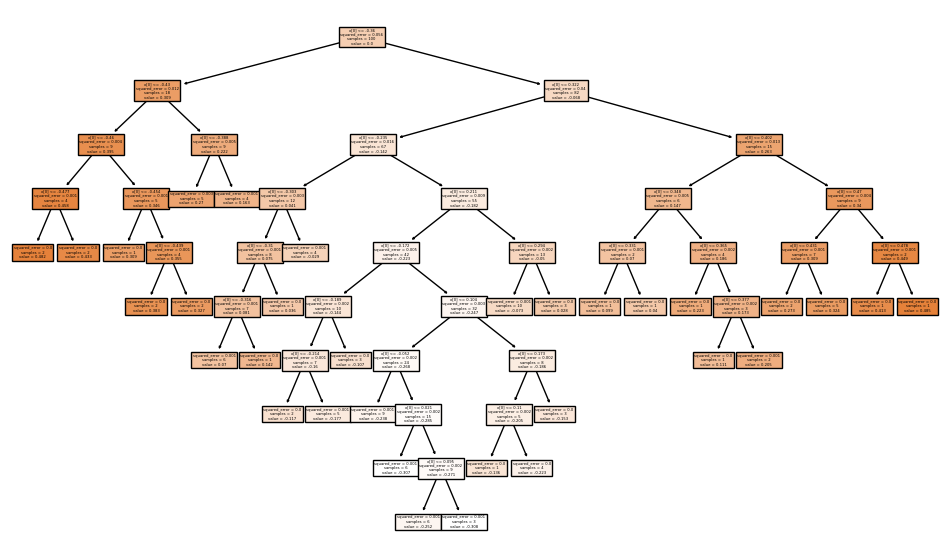

In [10]:
# plot the tree
plt.figure(figsize=(12,7))
plot_tree(dt1,filled=True)
plt.show()

In [11]:
# generate X_test

X_test = np.linspace(-0.5,0.5,100)

In [12]:
# gradient boost predictions

pred_2  = y_mean + y_pred_dt1
df['pred_2'] = pred_2

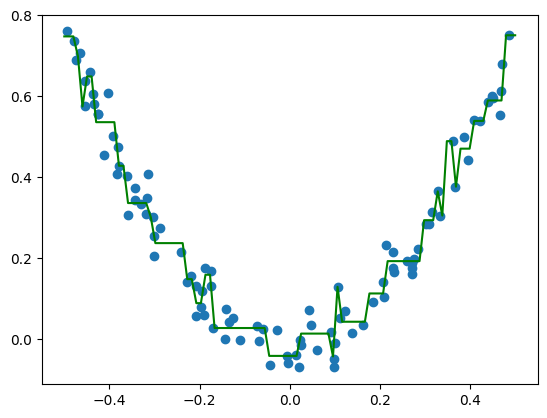

In [13]:
X_test_pred = dt1.predict(X_test.reshape(-1,1))

# plot the data

plt.scatter(X,y)
plt.plot(X_test,y_mean+ X_test_pred,color='green')
plt.show()

In [14]:
df

,X,y,pred_1,resid_1,pred_2
0,-0.125460,0.051573,0.265458,-0.213885,0.027260
1,0.450714,0.594480,0.265458,0.329021,0.589243
2,0.231994,0.166052,0.265458,-0.099407,0.192459
3,0.098658,-0.070178,0.265458,-0.335636,-0.042903
4,-0.343981,0.343986,0.265458,0.078528,0.335896
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.041576
96,0.022733,-0.002305,0.265458,-0.267763,0.013500
97,-0.072459,0.032809,0.265458,-0.232650,0.027260
98,-0.474581,0.689516,0.265458,0.424057,0.698519


In [15]:
# calculate the residulas for the decision tree
resid_2 = y - pred_2

df['resid_2'] = resid_2
df

,X,y,pred_1,resid_1,pred_2,resid_2
0,-0.125460,0.051573,0.265458,-0.213885,0.027260,0.024313
1,0.450714,0.594480,0.265458,0.329021,0.589243,0.005237
2,0.231994,0.166052,0.265458,-0.099407,0.192459,-0.026408
3,0.098658,-0.070178,0.265458,-0.335636,-0.042903,-0.027275
4,-0.343981,0.343986,0.265458,0.078528,0.335896,0.008090
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.041576,0.000901
96,0.022733,-0.002305,0.265458,-0.267763,0.013500,-0.015805
97,-0.072459,0.032809,0.265458,-0.232650,0.027260,0.005548
98,-0.474581,0.689516,0.265458,0.424057,0.698519,-0.009004


In [16]:
# train the second decision tree on this model

dt2 = DecisionTreeRegressor(max_leaf_nodes=32)

# fit on the data
dt2.fit(X,df['resid_2'])

# predict on thsi data
y_pred_dt2 = dt2.predict(X)

# calculate the score
r2_score(df['resid_2'],y_pred_dt2)

0.7003863366213179

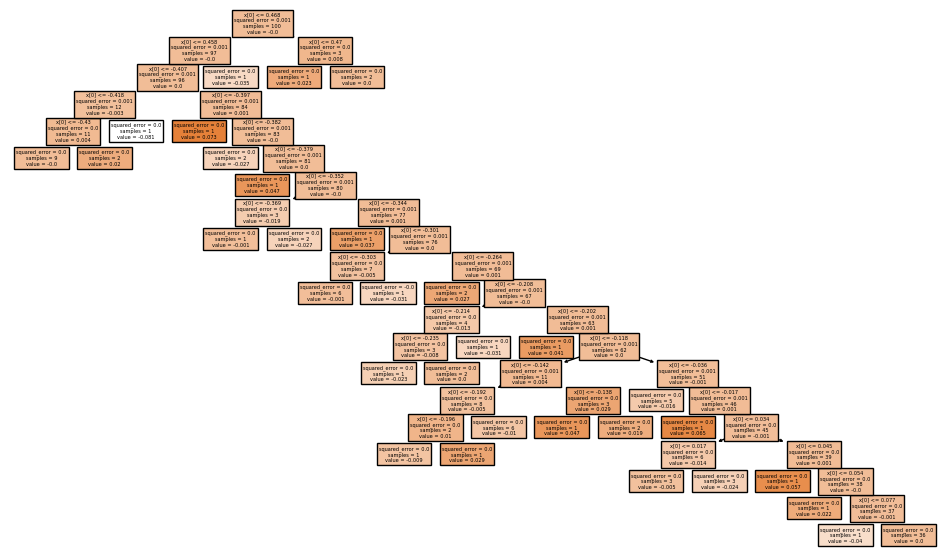

In [17]:
# plot the tree
plt.figure(figsize=(12,7))
plot_tree(dt2,filled=True)
plt.show()

In [18]:
# gradient boost predictions

pred_3  = pred_2 + dt2.predict(X)
df['pred_3'] = pred_3
df

,X,y,pred_1,resid_1,pred_2,resid_2,pred_3
0,-0.125460,0.051573,0.265458,-0.213885,0.027260,0.024313,0.046711
1,0.450714,0.594480,0.265458,0.329021,0.589243,0.005237,0.589689
2,0.231994,0.166052,0.265458,-0.099407,0.192459,-0.026408,0.192905
3,0.098658,-0.070178,0.265458,-0.335636,-0.042903,-0.027275,-0.042458
4,-0.343981,0.343986,0.265458,0.078528,0.335896,0.008090,0.334643
...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.041576,0.000901,-0.046182
96,0.022733,-0.002305,0.265458,-0.267763,0.013500,-0.015805,-0.010219
97,-0.072459,0.032809,0.265458,-0.232650,0.027260,0.005548,0.010959
98,-0.474581,0.689516,0.265458,0.424057,0.698519,-0.009004,0.698519


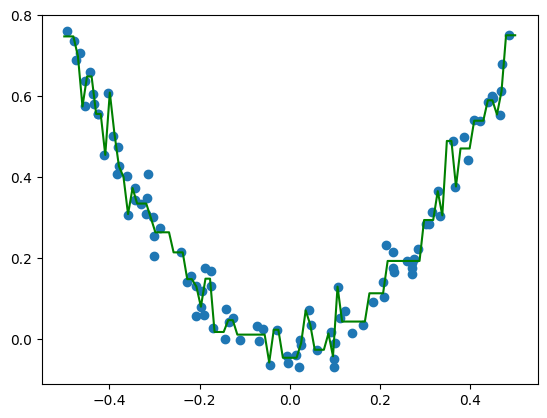

In [19]:
X_test_pred_2 = dt2.predict(X_test.reshape(-1,1))

# plot the data

plt.scatter(X,y)
plt.plot(X_test,y_mean+ X_test_pred + X_test_pred_2,color='green')
plt.show()

The model shows signs of overfitting we have to include the learning rate into the model so that the gradient boost model reaches to the specific outcome slowly and in a step by step manner.

### Train the gradient boost model using the learning rate set as 0.5

In [20]:
# train the first decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score

dt1 = DecisionTreeRegressor(max_leaf_nodes=32)

# fit on the data
dt1.fit(X,df['resid_1'])

# make preedictions
y_pred_dt1 = dt1.predict(X)

# calculate the accuracy score
r2_score(df['resid_1'],y_pred_dt1)

0.9888095365836786

This output is the output of the decision tree and not that of the gradient boost.          
The output of the gradient boost is defined as 

$$\hat y = f_0(X) + f_1(X)...f_n(X)$$
where the functions $f_1$ to $f_n$ are decision tree models.

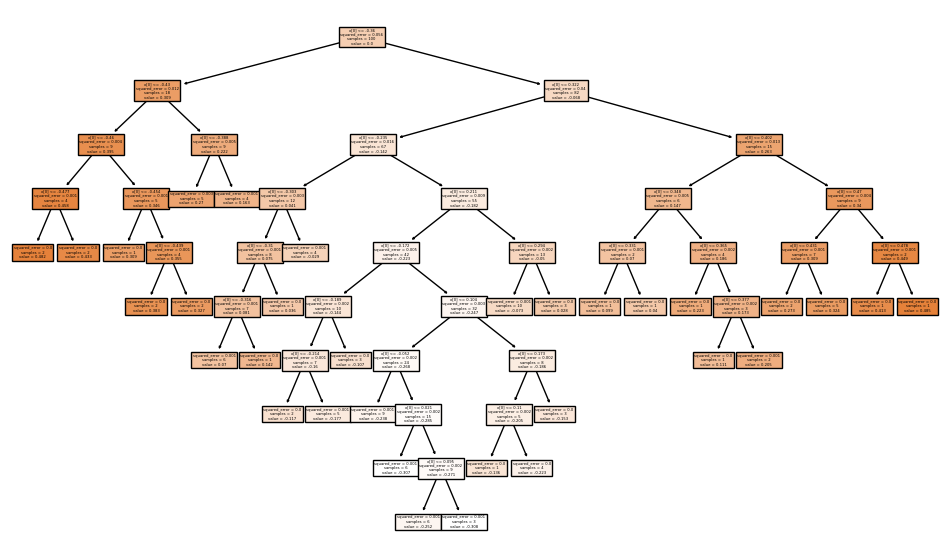

In [21]:
# plot the tree
plt.figure(figsize=(12,7))
plot_tree(dt1,filled=True)
plt.show()

In [22]:
# set the learning rate
lr = 0.5

In [23]:
# generate X_test

X_test = np.linspace(-0.5,0.5,100)

In [24]:
# gradient boost predictions

pred_2  = y_mean + (lr * y_pred_dt1)
df['pred_2'] = pred_2

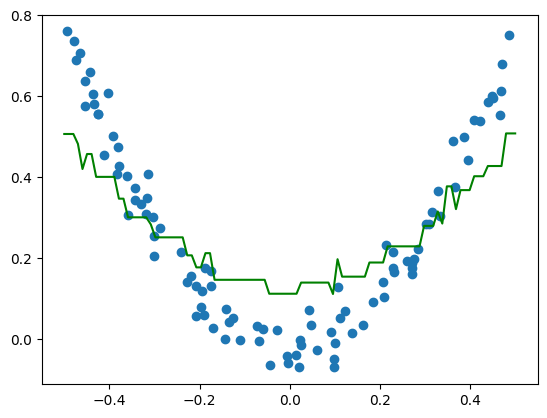

In [32]:
X_test_pred = dt1.predict(X_test.reshape(-1,1))

# plot the data

plt.scatter(X,y)
plt.plot(X_test,y_mean+(lr * X_test_pred),color='green')
plt.show()

After applying the learning rate the model is slowly converging towards the actual solution in step wise manner and this avoids the overfitting problem and the model is able to generalize well on the new test data.

In [33]:
df

,X,y,pred_1,resid_1,pred_2,resid_2,pred_3
0,-0.125460,0.051573,0.265458,-0.213885,0.146359,-0.094786,0.101208
1,0.450714,0.594480,0.265458,0.329021,0.427351,0.167129,0.502196
2,0.231994,0.166052,0.265458,-0.099407,0.228959,-0.062907,0.206379
3,0.098658,-0.070178,0.265458,-0.335636,0.111278,-0.181456,0.036241
4,-0.343981,0.343986,0.265458,0.078528,0.300677,0.043309,0.319787
...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.111941,-0.152616,0.032691
96,0.022733,-0.002305,0.265458,-0.267763,0.139479,-0.141784,0.060229
97,-0.072459,0.032809,0.265458,-0.232650,0.146359,-0.113551,0.075217
98,-0.474581,0.689516,0.265458,0.424057,0.481989,0.207527,0.596371


In [34]:
# calculate the residulas for the decision tree
resid_2 = y - pred_2

df['resid_2'] = resid_2
df

,X,y,pred_1,resid_1,pred_2,resid_2,pred_3
0,-0.125460,0.051573,0.265458,-0.213885,0.146359,-0.094786,0.101208
1,0.450714,0.594480,0.265458,0.329021,0.427351,0.167129,0.502196
2,0.231994,0.166052,0.265458,-0.099407,0.228959,-0.062907,0.206379
3,0.098658,-0.070178,0.265458,-0.335636,0.111278,-0.181456,0.036241
4,-0.343981,0.343986,0.265458,0.078528,0.300677,0.043309,0.319787
...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.111941,-0.152616,0.032691
96,0.022733,-0.002305,0.265458,-0.267763,0.139479,-0.141784,0.060229
97,-0.072459,0.032809,0.265458,-0.232650,0.146359,-0.113551,0.075217
98,-0.474581,0.689516,0.265458,0.424057,0.481989,0.207527,0.596371


In [35]:
# train the second decision tree on this model

dt2 = DecisionTreeRegressor(max_leaf_nodes=32)

# fit on the data
dt2.fit(X,df['resid_2'])

# predict on thsi data
y_pred_dt2 = dt2.predict(X)

# calculate the score
r2_score(df['resid_2'],y_pred_dt2)

0.9769162441878578

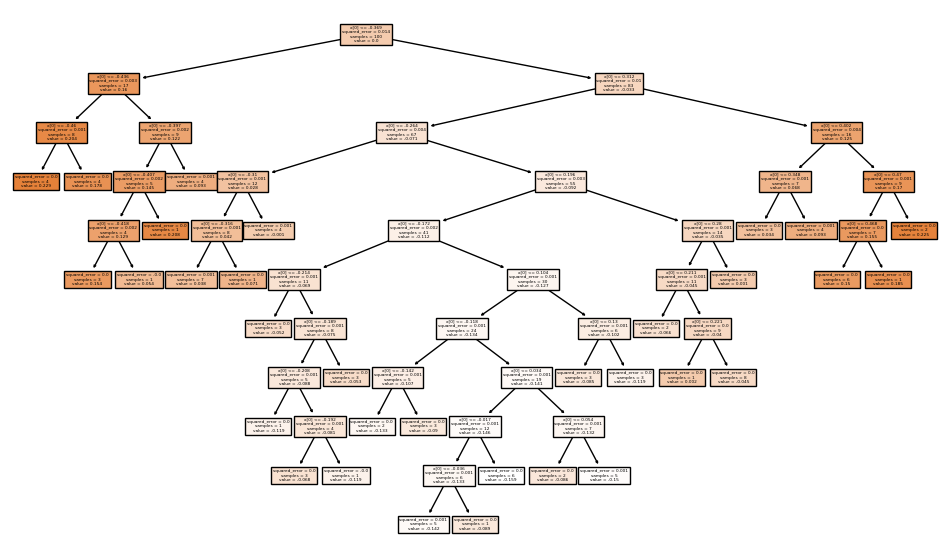

In [36]:
# plot the tree
plt.figure(figsize=(12,7))
plot_tree(dt2,filled=True)
plt.show()

In [38]:
# gradient boost predictions

pred_3  = pred_2 + (lr * dt2.predict(X))
df['pred_3'] = pred_3
df

,X,y,pred_1,resid_1,pred_2,resid_2,pred_3
0,-0.125460,0.051573,0.265458,-0.213885,0.146359,-0.094786,0.101208
1,0.450714,0.594480,0.265458,0.329021,0.427351,0.167129,0.502196
2,0.231994,0.166052,0.265458,-0.099407,0.228959,-0.062907,0.206379
3,0.098658,-0.070178,0.265458,-0.335636,0.111278,-0.181456,0.036241
4,-0.343981,0.343986,0.265458,0.078528,0.300677,0.043309,0.319787
...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.111941,-0.152616,0.032691
96,0.022733,-0.002305,0.265458,-0.267763,0.139479,-0.141784,0.060229
97,-0.072459,0.032809,0.265458,-0.232650,0.146359,-0.113551,0.075217
98,-0.474581,0.689516,0.265458,0.424057,0.481989,0.207527,0.596371


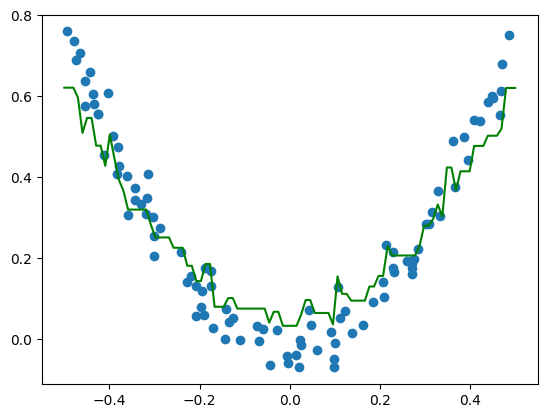

In [40]:
X_test_pred_2 = dt2.predict(X_test.reshape(-1,1))

# plot the data

plt.scatter(X,y)
plt.plot(X_test,y_mean+(lr * X_test_pred) +(lr * X_test_pred_2),color='green')
plt.show()

In [41]:
df

,X,y,pred_1,resid_1,pred_2,resid_2,pred_3
0,-0.125460,0.051573,0.265458,-0.213885,0.146359,-0.094786,0.101208
1,0.450714,0.594480,0.265458,0.329021,0.427351,0.167129,0.502196
2,0.231994,0.166052,0.265458,-0.099407,0.228959,-0.062907,0.206379
3,0.098658,-0.070178,0.265458,-0.335636,0.111278,-0.181456,0.036241
4,-0.343981,0.343986,0.265458,0.078528,0.300677,0.043309,0.319787
...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.111941,-0.152616,0.032691
96,0.022733,-0.002305,0.265458,-0.267763,0.139479,-0.141784,0.060229
97,-0.072459,0.032809,0.265458,-0.232650,0.146359,-0.113551,0.075217
98,-0.474581,0.689516,0.265458,0.424057,0.481989,0.207527,0.596371


In [42]:
# calculate the residuals for the third decision tree

df['resid_3'] = df['y'] - df['pred_3']

In [43]:
df

,X,y,pred_1,resid_1,pred_2,resid_2,pred_3,resid_3
0,-0.125460,0.051573,0.265458,-0.213885,0.146359,-0.094786,0.101208,-0.049635
1,0.450714,0.594480,0.265458,0.329021,0.427351,0.167129,0.502196,0.092283
2,0.231994,0.166052,0.265458,-0.099407,0.228959,-0.062907,0.206379,-0.040327
3,0.098658,-0.070178,0.265458,-0.335636,0.111278,-0.181456,0.036241,-0.106419
4,-0.343981,0.343986,0.265458,0.078528,0.300677,0.043309,0.319787,0.024199
...,...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.111941,-0.152616,0.032691,-0.073366
96,0.022733,-0.002305,0.265458,-0.267763,0.139479,-0.141784,0.060229,-0.062534
97,-0.072459,0.032809,0.265458,-0.232650,0.146359,-0.113551,0.075217,-0.042409
98,-0.474581,0.689516,0.265458,0.424057,0.481989,0.207527,0.596371,0.093144


In [44]:
# train the third decision tree
dt3 = DecisionTreeRegressor(max_leaf_nodes=32)

# fit on the data
dt3.fit(X,df['resid_2'])

# predict on thsi data
y_pred_dt3 = dt3.predict(X)

# calculate the score
r2_score(df['resid_2'],y_pred_dt3)

0.9769162441878578

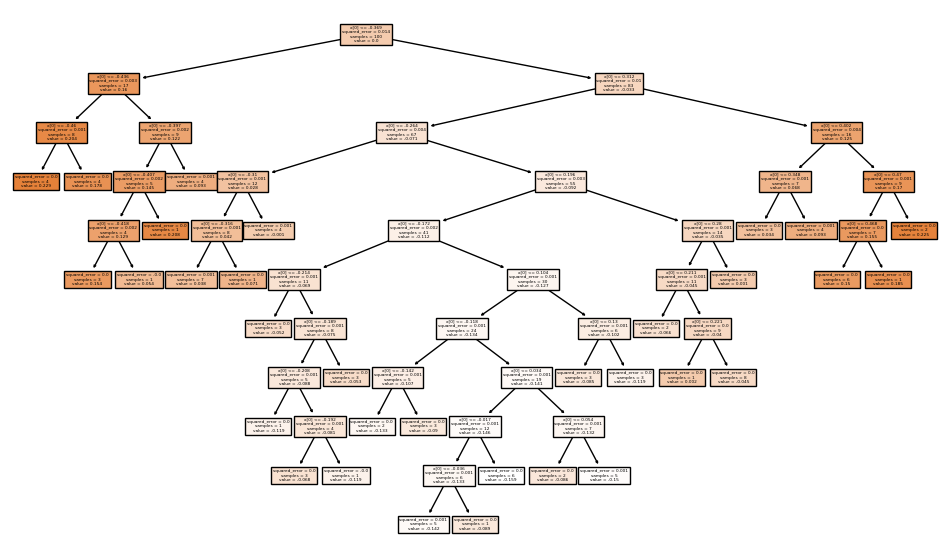

In [45]:
# plot the tree
plt.figure(figsize=(12,7))
plot_tree(dt3,filled=True)
plt.show()

In [46]:
# gradient boost predictions

pred_4  = pred_3 + (lr * dt3.predict(X))
df['pred_4'] = pred_4
df

,X,y,pred_1,resid_1,pred_2,resid_2,pred_3,resid_3,pred_4
0,-0.125460,0.051573,0.265458,-0.213885,0.146359,-0.094786,0.101208,-0.049635,0.056057
1,0.450714,0.594480,0.265458,0.329021,0.427351,0.167129,0.502196,0.092283,0.577042
2,0.231994,0.166052,0.265458,-0.099407,0.228959,-0.062907,0.206379,-0.040327,0.183799
3,0.098658,-0.070178,0.265458,-0.335636,0.111278,-0.181456,0.036241,-0.106419,-0.038796
4,-0.343981,0.343986,0.265458,0.078528,0.300677,0.043309,0.319787,0.024199,0.338896
...,...,...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.111941,-0.152616,0.032691,-0.073366,-0.046559
96,0.022733,-0.002305,0.265458,-0.267763,0.139479,-0.141784,0.060229,-0.062534,-0.019021
97,-0.072459,0.032809,0.265458,-0.232650,0.146359,-0.113551,0.075217,-0.042409,0.004075
98,-0.474581,0.689516,0.265458,0.424057,0.481989,0.207527,0.596371,0.093144,0.710753


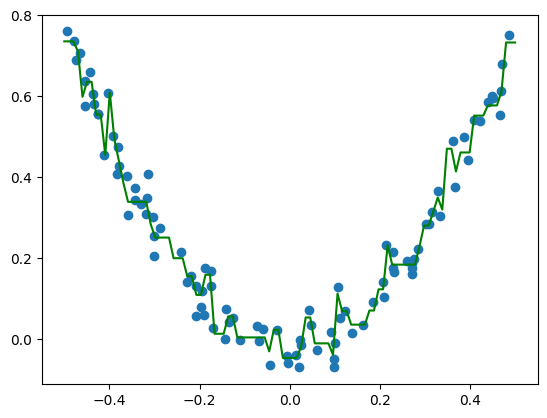

In [47]:
X_test_pred_3 = dt3.predict(X_test.reshape(-1,1))

# plot the data

plt.scatter(X,y)
plt.plot(X_test,y_mean+(lr * X_test_pred) +(lr * X_test_pred_2) + (lr * X_test_pred_3),color='green')
plt.show()

We can clearly observe that by including the learning rate into the final prediction equation, we are able to slowly reach the solution and the model is also less prone to overfitting in this case.